In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from tqdm import tqdm
import os
import subprocess
import tarfile
from random import sample

Populating the interactive namespace from numpy and matplotlib


In [ ]:
tar_name = '0093'
subprocess.call(f'gsutil cp gs://eccv16/dataset_unaligned/{tar_name}.tar . ', shell=True, executable='/bin/bash')

In [ ]:
tar = tarfile.open(f'{tar_name}.tar')
tar.extractall('.') # specify which folder to extract to
tar.close()

In [ ]:
def coors(filename):
  with open(filename) as fp:
    f = fp.read()
    f = f.split(' ')
    f = f[5:7]
    f = [float(x) for x in f]
  return tuple(f)

def folders_to_coors(folder_name):
  coor_set = set()
  for file in tqdm(os.listdir(folder_name)):
    if file[-3:] == 'txt':
      coords = coors(f'{folder_name}/{file}')
      coor_set.add(coords)
  return coor_set

In [ ]:
df = pd.DataFrame(folders_to_coors(tar_name))
df.columns = ['Latitude', 'Longitude']

100%|██████████| 216599/216599 [01:03<00:00, 3388.35it/s]


In [ ]:
df.describe().loc[['count', 'min', 'max']]

Latitude    Longitude
count  6302.000000  6302.000000
min      52.366201     4.893578
max      52.380811     4.912701

In [ ]:
images = [x for x in os.listdir(tar_name) if x[-3:] == 'jpg']

In [ ]:
chosen_imgs = sample(images, k=6*10)

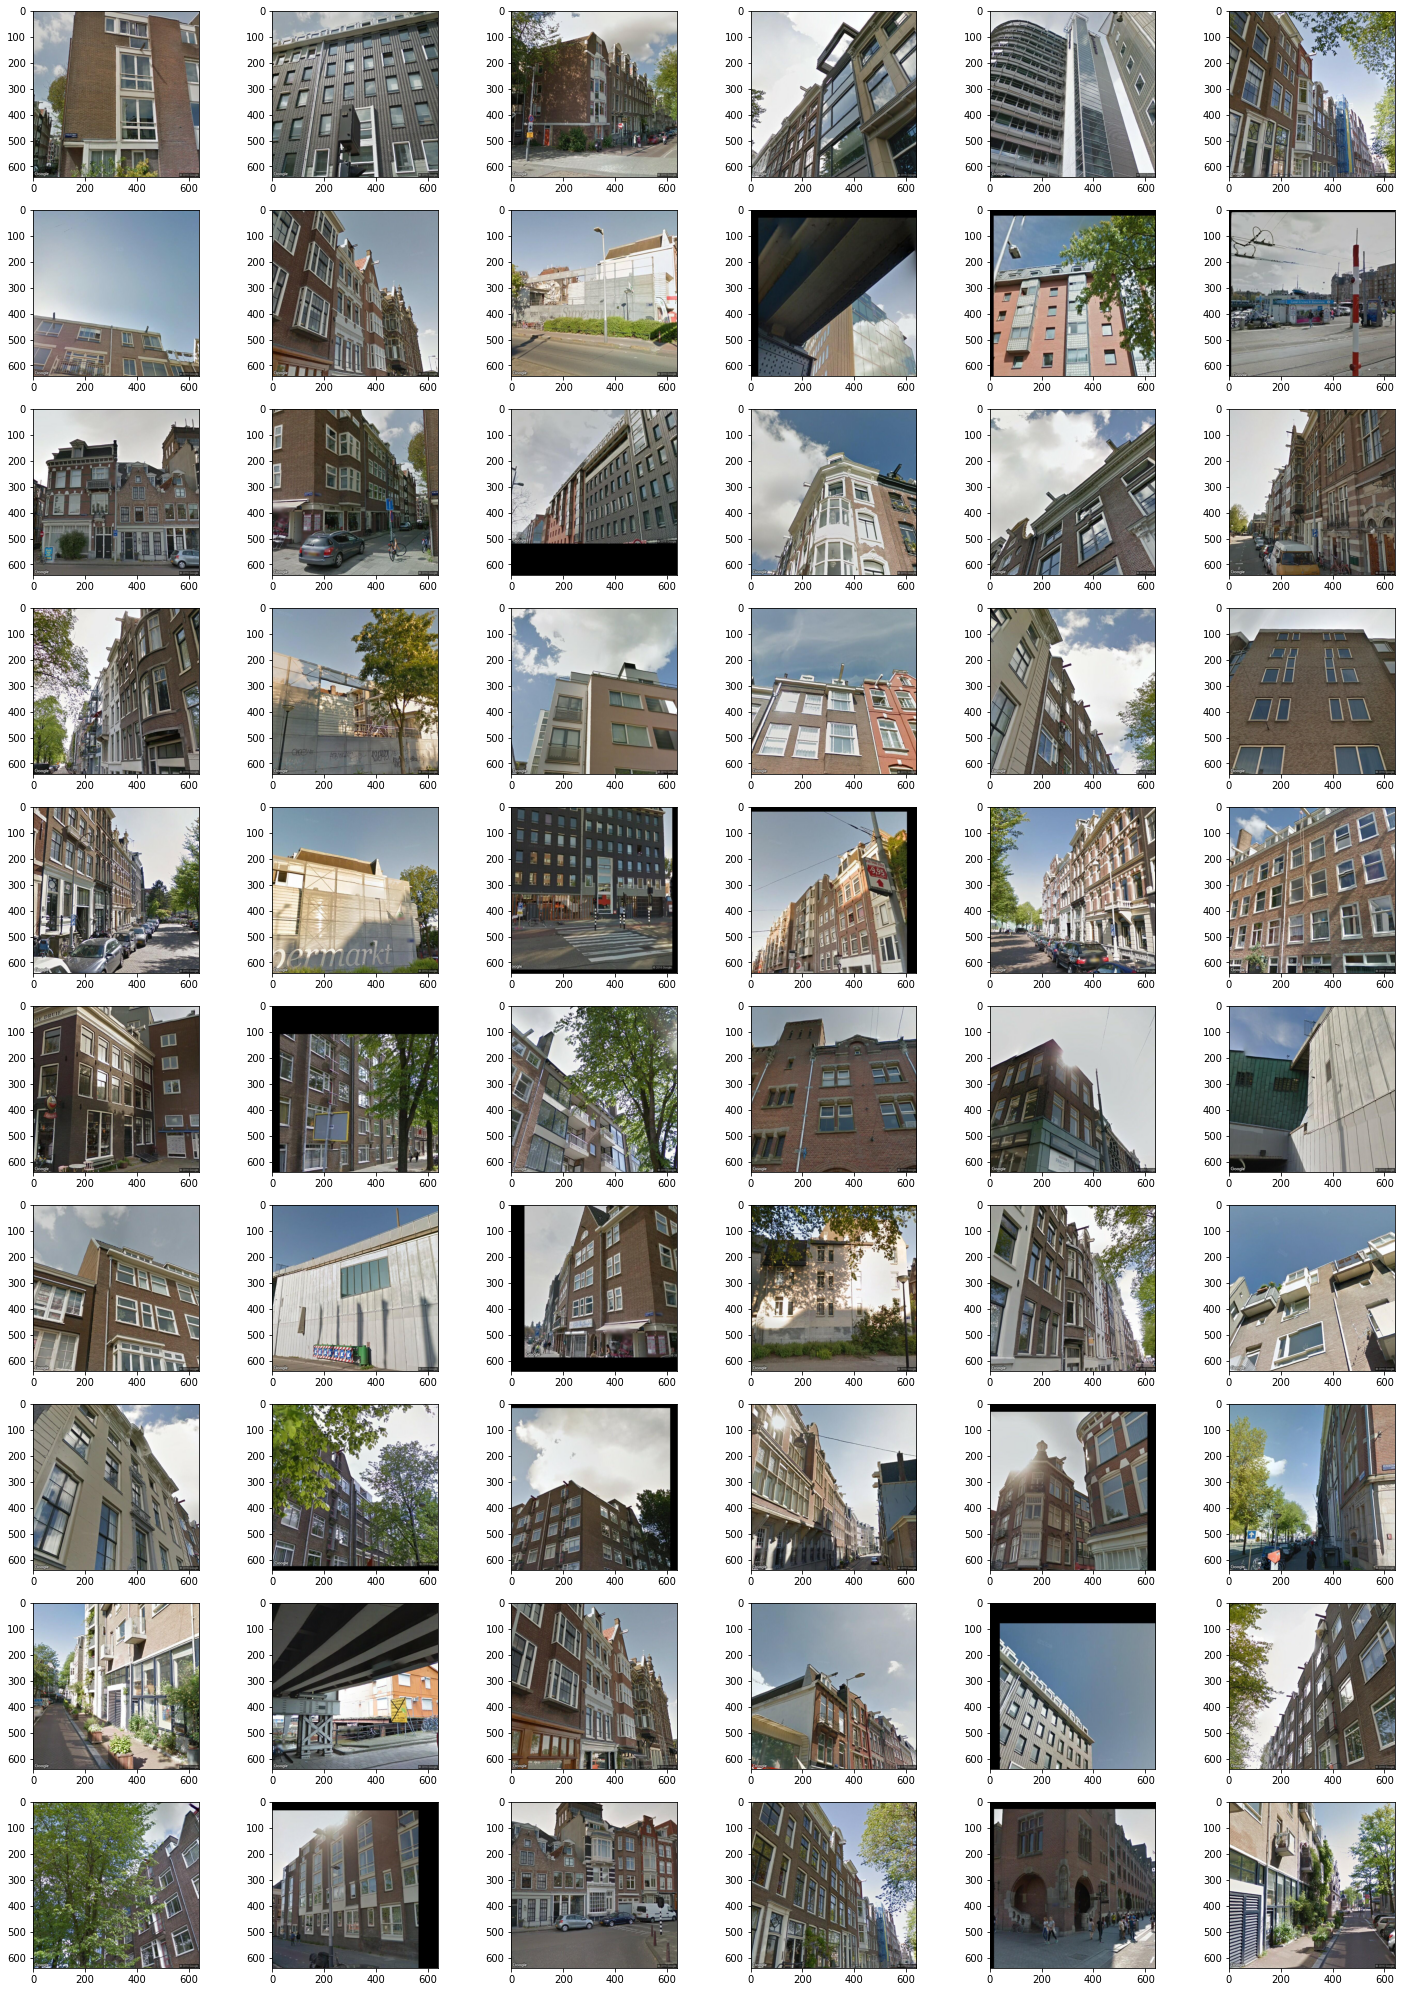

In [ ]:
n_row = 10
n_col = 6
_, axs = plt.subplots(n_row, n_col, figsize=(25, 36))
axs = axs.flatten()
for img, ax in zip(chosen_imgs, axs):
  img = mpimg.imread(f'{tar_name}/{img}')
  ax.imshow(img)
plt.show()